# Importing all the libraries


In [109]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt # data visualisation
import seaborn as sns # data visualisation
%matplotlib inline

# load data

In [110]:
df =pd.read_csv(r"C:\Users\nini\Downloads\cereal.csv")
df.head(6)

,name,mfr,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
0,100% Bran,N,C,70,4,1,130,10.0,5.0,6,280,25,3,1.0,0.33,68.402973
1,100% Natural Bran,Q,C,120,3,5,15,2.0,8.0,8,135,0,3,1.0,1.00,33.983679
2,All-Bran,K,C,70,4,1,260,9.0,7.0,5,320,25,3,1.0,0.33,59.425505
3,All-Bran with Extra Fiber,K,C,50,4,0,140,14.0,8.0,0,330,25,3,1.0,0.50,93.704912
4,Almond Delight,R,C,110,2,2,200,1.0,14.0,8,-1,25,3,1.0,0.75,34.384843
5,Apple Cinnamon Cheerios,G,C,110,2,2,180,1.5,10.5,10,70,25,1,1.0,0.75,29.509541


We want to predict what will will be the rating

# analys data

In [111]:
df.shape

(77, 16)

In [112]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77 entries, 0 to 76
Data columns (total 16 columns):
name        77 non-null object
mfr         77 non-null object
type        77 non-null object
calories    77 non-null int64
protein     77 non-null int64
fat         77 non-null int64
sodium      77 non-null int64
fiber       77 non-null float64
carbo       77 non-null float64
sugars      77 non-null int64
potass      77 non-null int64
vitamins    77 non-null int64
shelf       77 non-null int64
weight      77 non-null float64
cups        77 non-null float64
rating      77 non-null float64
dtypes: float64(5), int64(8), object(3)
memory usage: 9.7+ KB


In [113]:
df.describe()
    
    

,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
count,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000
mean,106.883117,2.545455,1.012987,159.675325,2.151948,14.597403,6.922078,96.077922,28.246753,2.207792,1.029610,0.821039,42.665705
std,19.484119,1.094790,1.006473,83.832295,2.383364,4.278956,4.444885,71.286813,22.342523,0.832524,0.150477,0.232716,14.047289
min,50.000000,1.000000,0.000000,0.000000,0.000000,-1.000000,-1.000000,-1.000000,0.000000,1.000000,0.500000,0.250000,18.042851
25%,100.000000,2.000000,0.000000,130.000000,1.000000,12.000000,3.000000,40.000000,25.000000,1.000000,1.000000,0.670000,33.174094
50%,110.000000,3.000000,1.000000,180.000000,2.000000,14.000000,7.000000,90.000000,25.000000,2.000000,1.000000,0.750000,40.400208
75%,110.000000,3.000000,2.000000,210.000000,3.000000,17.000000,11.000000,120.000000,25.000000,3.000000,1.000000,1.000000,50.828392
max,160.000000,6.000000,5.000000,320.000000,14.000000,23.000000,15.000000,330.000000,100.000000,3.000000,1.500000,1.500000,93.704912


In [114]:
# class distribution
print(df.groupby('mfr').size())

mfr
A     1
G    22
K    23
N     6
P     9
Q     8
R     8
dtype: int64


In [115]:
#only 1 of type 1
print(df.groupby('type').size())

type
C    74
H     3
dtype: int64


finding problems in the data

In [116]:
#value can't be negative
criteria_1 = df["carbo"] < 0
criteria_2 = df["sugars"] < 0
criteria_3 = df["potass"] < 0

df[criteria_1 | criteria_2 | criteria_3]

,name,mfr,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
4,Almond Delight,R,C,110,2,2,200,1.0,14.0,8,-1,25,3,1.0,0.75,34.384843
20,Cream of Wheat (Quick),N,H,100,3,0,80,1.0,21.0,0,-1,0,2,1.0,1.00,64.533816
57,Quaker Oatmeal,Q,H,100,5,2,0,2.7,-1.0,-1,110,0,1,1.0,0.67,50.828392


In [117]:
df=df.drop(df.index[4])



In [118]:
df=df[df.name!='Cream of Wheat (Quick)']


In [119]:
df=df[df.name!='Quaker Oatmeal']


In [120]:
#there is a problem with weight in ounces of one serving
#let's use specific gravity
df[df["weight"] < 1].head()

,name,mfr,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
54,Puffed Rice,Q,C,50,1,0,0,0.0,13.0,0,15,0,3,0.50,1.0,60.756112
55,Puffed Wheat,Q,C,50,2,0,0,1.0,10.0,0,50,0,3,0.50,1.0,63.005645
63,Shredded Wheat,N,C,80,2,0,0,3.0,16.0,0,95,0,1,0.83,1.0,68.235885


In [121]:
# Normalize with weight
cols = ['calories', 'protein', 'fat', 'sodium', 'fiber', 'carbo', 'sugars', 'potass', 'vitamins']

for i in cols:
    df[i] = (df[i]/df["weight"]).round(0).astype(int)
    
df[df["weight"] < 1].head()


,name,mfr,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
54,Puffed Rice,Q,C,100,2,0,0,0,26,0,30,0,3,0.50,1.0,60.756112
55,Puffed Wheat,Q,C,100,4,0,0,2,20,0,100,0,3,0.50,1.0,63.005645
63,Shredded Wheat,N,C,96,2,0,0,4,19,0,114,0,1,0.83,1.0,68.235885


# ploting

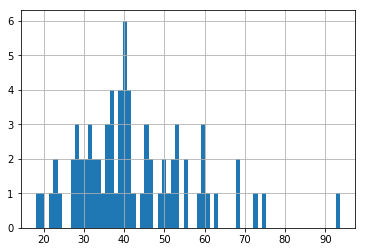

In [122]:
df['rating'].hist(bins=70)

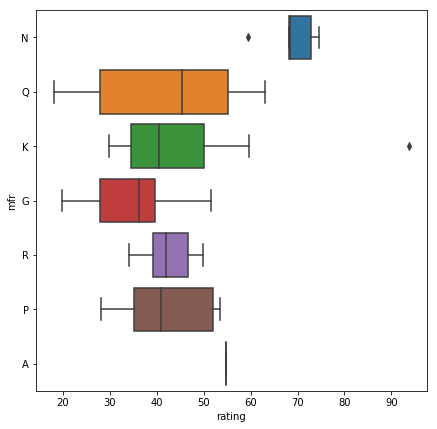

In [123]:
ax = plt.subplots(figsize = (7,7))
sns.boxplot(y = "mfr", x = "rating", data = df)

In [124]:
#explain
df[df['mfr']=='N']
#N is the most popular

,name,mfr,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
0,100% Bran,N,C,70,4,1,130,10,5,6,280,25,3,1.00,0.33,68.402973
63,Shredded Wheat,N,C,96,2,0,0,4,19,0,114,0,1,0.83,1.00,68.235885
64,Shredded Wheat 'n'Bran,N,C,90,3,0,0,4,19,0,140,0,1,1.00,0.67,74.472949
65,Shredded Wheat spoon size,N,C,90,3,0,0,3,20,0,120,0,1,1.00,0.67,72.801787
68,Strawberry Fruit Wheats,N,C,90,2,0,15,3,15,5,90,25,2,1.00,1.00,59.363993


In [125]:
#create a function for ploting
def scatter_this (macro,y):
    ax = plt.subplots(figsize = (4,4))
    sns.regplot(x = macro, y = y, data = df)
    plt.title("%s vs %s" %(y, macro))
    

In [126]:
df.columns

Index(['name', 'mfr', 'type', 'calories', 'protein', 'fat', 'sodium', 'fiber',
       'carbo', 'sugars', 'potass', 'vitamins', 'shelf', 'weight', 'cups',
       'rating'],
      dtype='object')

C:\Users\nini\Desktop\New folder\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


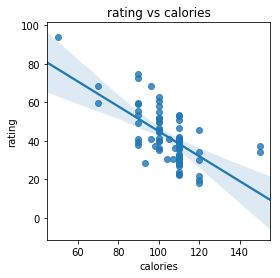

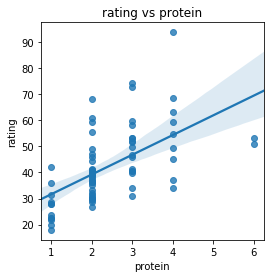

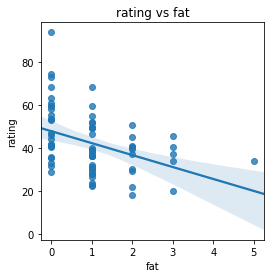

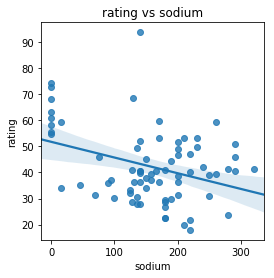

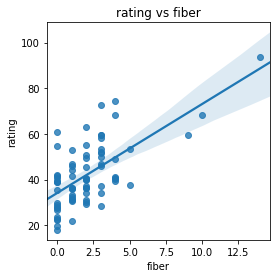

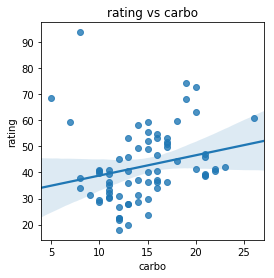

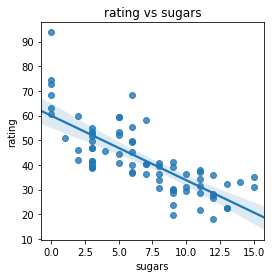

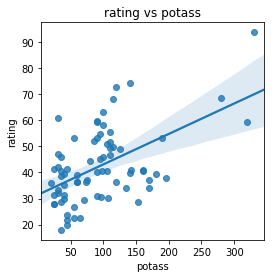

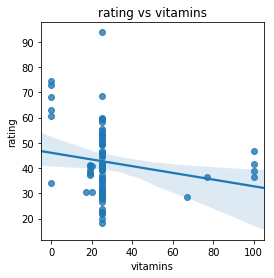

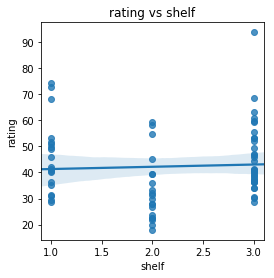

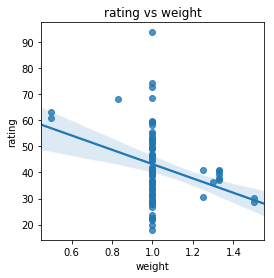

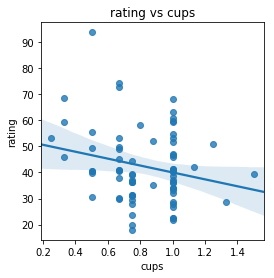

In [127]:
cols = df.columns[3:15]

for i in cols:
    scatter_this(i,"rating")

There is some correlation between rating with calories, protein,potass, fat and sugars. These few attributes should be used to model and predict the rating first. Should the performance of the model is too weak, 
then other attributes should be looked at.

# Data Transformations


Now that we have comparable variables across cereals let’s standardize those variables to have an holistic approach of a cereal in all its features. This allow us to create new features with the existing variables.

In [128]:
import scipy.stats                # statistics
from sklearn import preprocessing

cereals_scale = df

scaler = preprocessing.StandardScaler()
columns =df.columns[3:]
cereals_scale[columns] = scaler.fit_transform(cereals_scale[columns])
cereals_scale.head()

,name,mfr,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
0,100% Bran,N,C,-2.425944,1.483869,0.013607,-0.317158,3.372850,-2.282725,-0.180120,2.930744,-0.130479,0.948401,-0.202203,-2.099895,1.867565
1,100% Natural Bran,Q,C,1.140203,0.545353,4.041284,-1.731737,-0.046203,-1.565943,0.313542,0.650497,-1.362042,0.948401,-0.202203,0.761919,-0.601791
2,All-Bran,K,C,-2.425944,1.483869,0.013607,1.281931,2.945468,-1.804870,-0.426951,3.559778,-0.130479,0.948401,-0.202203,-2.099895,1.223491
3,All-Bran with Extra Fiber,K,C,-3.852404,1.483869,-0.993312,-0.194151,5.082377,-1.565943,-1.661108,3.717037,-0.130479,0.948401,-0.202203,-1.373763,3.682812
5,Apple Cinnamon Cheerios,G,C,0.426974,-0.393162,1.020526,0.297876,-0.046203,-1.088088,0.807205,-0.371682,-0.130479,-1.471657,-0.202203,-0.305922,-0.922781


# creat a model

In [129]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score



In [143]:

X = df.drop(['name', 'mfr', 'type','rating'], axis=1)
y = df["rating"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)

linear_reg = LinearRegression()
linear_reg.fit(X_train, y_train)
y_pred = linear_reg.predict(X_test)
r2_all = r2_score(y_test, y_pred)
r2_all

0.9742739792934942

Consluion:
If you were to repeat the linear regression model part again, you'll notice the R2 value of the linear regression change. The R2 value can be significantly high or low depending on the distribution of the samples between the training and testing sets. 
In one trial, the training set may contain dataset that very scattered and in another trial, the training set may have dataset that is not so scattered.


# cross_val_score

In [156]:
from sklearn.model_selection import cross_val_score
 


regr = linear_model.LinearRegression()

scores = cross_validation.cross_val_score(regr, X, y, cv=15,)

# This will print the mean of the list of errors that were output and 
# provide your metric for evaluation
print (scores)
print (scores.mean())

[0.9945553  0.98031784 0.99801539 0.9813986  0.98231894 0.98841335
 0.97585261 0.90341968 0.86205466 0.98420268 0.19178759 0.88211278
 0.98779395 0.88529765 0.99457534]
0.9061410903569377


Text(0,0.5,' ffold')

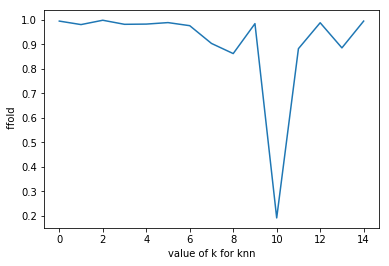

In [162]:
plt.plot(scores)
plt.xlabel("value of k for knn")
plt.ylabel(" ffold")


checking another model

In [ ]:

from sklearn.ensemble import RandomForestRegressor
# Establish model
model = RandomForestRegressor(n_jobs=-1)
# Try different numbers of n_estimators - this will take a minute or so
estimators = np.arange(10, 200, 10)
scores = []
for n in estimators:
    model.set_params(n_estimators=n)
    model.fit(X_train, y_train)
    scores.append(model.score(X_test, y_test))
plt.title("Effect of n_estimators")
plt.xlabel("n_estimator")
plt.ylabel("score")
plt.plot(estimators, scores)

In [ ]:
scores